# Data loading

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jar = pd.read_csv('fuel_swelling_20240109.txt', sep=' ')
columns_drop = ['%eval_id', 'interface', 'FD1', 'FD2', 'FD3', 'fuel_swelling1', 'fuel_swelling2']
jar.drop(columns=columns_drop, inplace=True)

In [3]:
jar

,dGrainHBS,FaceCovMax,SwellLink,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,fuel_swelling3
0,0.000044,0.725,0.02270,1.907000e-18,29010.0,6.315000e-10,5.296000e-31,44.947087
1,0.000048,0.899,0.02587,2.074000e-18,28080.0,6.653000e-10,5.740000e-31,42.531250
2,0.000045,0.835,0.02241,2.134000e-18,35430.0,6.577000e-10,5.252000e-31,42.858313
3,0.000046,0.628,0.02796,1.870000e-18,31140.0,5.596000e-10,5.104000e-31,47.988939
4,0.000042,0.725,0.02707,1.696000e-18,27470.0,6.026000e-10,5.070000e-31,43.136858
...,...,...,...,...,...,...,...,...
3195,0.000038,0.787,0.02303,2.002000e-18,28810.0,5.710000e-10,4.533000e-31,39.049876
3196,0.000039,0.743,0.02428,1.664000e-18,24780.0,6.381000e-10,5.127000e-31,41.342469
3197,0.000038,0.800,0.02456,1.751000e-18,31310.0,5.117000e-10,5.247000e-31,39.040535
3198,0.000046,0.795,0.02365,2.136000e-18,36170.0,5.038000e-10,5.705000e-31,44.282862


# Linear

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [5]:
feat_ind = list(range(7))
features = jar.iloc[:, feat_ind]
xscaler = StandardScaler()
X = xscaler.fit_transform(features)
y = jar['fuel_swelling3']

In [6]:
reg = LinearRegression().fit(X, y)

In [7]:
reg.score(X, y)

0.996884663293091

In [8]:
reg.coef_

array([ 2.82724374, -1.77142238, -0.35113877, -0.03660669,  0.02490697,
        0.00399536,  0.01631501])

# Sensitivity Analysis

In [9]:
from SALib.analyze.sobol import analyze
from SALib.sample.sobol import sample

In [10]:
problem = {
    'num_vars': 7,
    'names': ['dGrainHBS', 'FaceCovMax', 'SwellLink', 'vResol',
              'DatomFissBGx', 'fNucleate', 'aAtomDifFiss'],
    'bounds': [[-3, 3]]*7
}

In [11]:
param_vals = sample(problem, 1024, calc_second_order=False)
Y = reg.predict(param_vals)

In [12]:
Si = analyze(problem, Y,
             calc_second_order=False, print_to_console=True)

                    ST       ST_conf
dGrainHBS     0.711000  5.824369e-02
FaceCovMax    0.279121  2.216667e-02
SwellLink     0.010967  1.040770e-03
vResol        0.000119  8.487338e-06
DatomFissBGx  0.000055  4.824599e-06
fNucleate     0.000001  1.244356e-07
aAtomDifFiss  0.000024  2.274835e-06
                    S1   S1_conf
dGrainHBS     0.709704  0.066458
FaceCovMax    0.277822  0.041989
SwellLink     0.010968  0.010676
vResol        0.000119  0.000994
DatomFissBGx  0.000061  0.000779
fNucleate     0.000001  0.000100
aAtomDifFiss  0.000024  0.000352


/home/atom/research/wd-swelling/.swel/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


/home/atom/research/wd-swelling/.swel/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >], dtype=object)

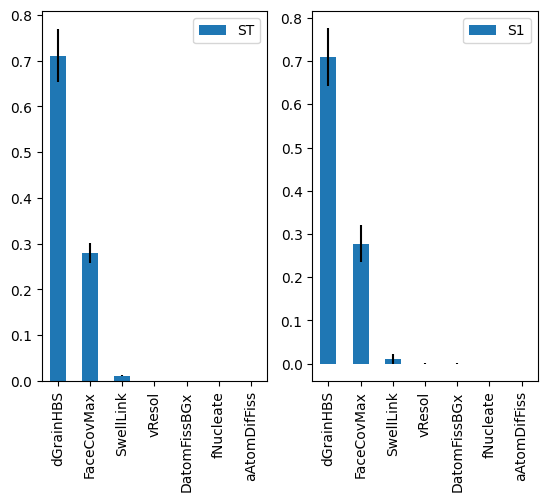

In [13]:
Si.plot()